<a href="https://colab.research.google.com/github/zugzwang03/Machine-Learning-Materials/blob/main/classify_handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

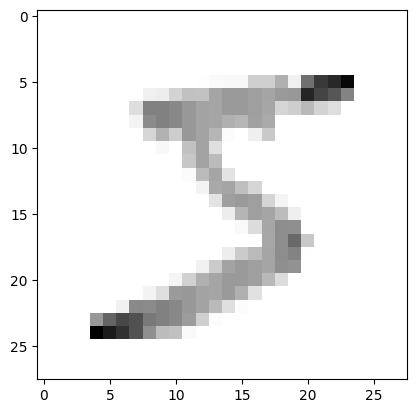

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2639 - accuracy: 0.9232
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1067 - accuracy: 0.9675
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0935 - accuracy: 0.9711
loss:  0.09347079694271088  accuracy:  0.9710999727249146
313/313 [==============================] - 1s 2ms/step
y predicted:  7  y_test:  7


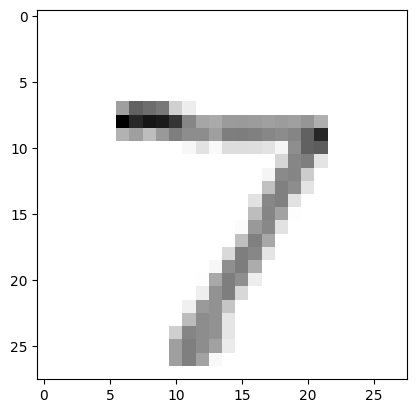

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import logging

logging.getLogger("tensorflow").setLevel(logging.ERROR)

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

def draw(n):
	plt.imshow(n, cmap=plt.cm.binary)
	plt.show()

draw(x_train[0])

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)
loss, accuracy = model.evaluate(x_test, y_test)
print("loss: ", loss, " accuracy: ", accuracy)

y_predicted = model.predict([x_test])
print("y predicted: ", np.argmax(y_predicted[0]), " y_test: ", y_test[0])
draw(x_test[0])

In [21]:
model.save('epic_num_reader.h5')

[4.7024616e+05 8.8991776e+07 5.7986417e+09 3.1150058e+08 1.9477478e+05
 1.4568192e+06 4.7531933e+01 9.9993776e+13 1.2528086e+06 6.9577360e+06]


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 1s 2ms/step
label ->  1
prediction ->  1


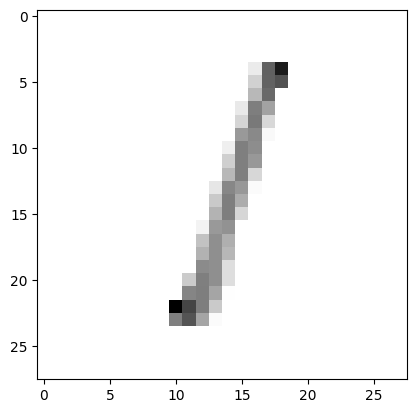

In [24]:
new_model = tf.keras.models.load_model('epic_num_reader.h5')
predictions = new_model.predict([x_test])


print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))

draw(x_test[2])